📊 Análise Exploratória do IDH Brasileiro
# 
# **Dataset:** HDI Brazil - Índice de Desenvolvimento Humano Municipal - ATLAS BRASIL(Kaggle)
# 
# Este notebook explora os dados processados pelo pipeline de engenharia de dados.

In [1]:
# 1. Configuração e Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Configurações de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Bibliotecas importadas e configuradas!")

✅ Bibliotecas importadas e configuradas!


# 2. Carregamento dos Dados Processados

In [3]:
# Caminhos dos arquivos
DATA_PATH = "../src/data/output/"

In [4]:
# Carregar todos os datasets processados
try:
    df_classificado = pd.read_csv(f"{DATA_PATH}idh_brasil_classificado.csv")
    df_estatisticas = pd.read_csv(f"{DATA_PATH}estatisticas_gerais_idh.csv")
    df_categorias = pd.read_csv(f"{DATA_PATH}distribuicao_categorias_idh.csv")
    df_top10 = pd.read_csv(f"{DATA_PATH}top_10_municipios_idh.csv")
    df_por_estado = pd.read_csv(f"{DATA_PATH}idh_por_estado.csv")
    df_por_regiao = pd.read_csv(f"{DATA_PATH}idh_por_regiao.csv")
    df_evolucao = pd.read_csv(f"{DATA_PATH}evolucao_temporal_idh.csv")
    df_componentes = pd.read_csv(f"{DATA_PATH}componentes_idh.csv")
    
    print("✅ Todos os datasets carregados com sucesso!")
    print(f"📁 Datasets carregados: {len([df_classificado, df_estatisticas, df_categorias, df_top10, df_por_estado, df_por_regiao, df_evolucao, df_componentes])}")
    
except Exception as e:
    print(f"❌ Erro ao carregar datasets: {e}")

✅ Todos os datasets carregados com sucesso!
📁 Datasets carregados: 8


## 3. Visão Geral dos Dados

In [5]:
# Informações básicas sobre o dataset principal
print("📊 VISÃO GERAL DO DATASET PRINCIPAL")
print("=" * 50)
print(f"• Período dos dados: {df_classificado['ano'].min()} - {df_classificado['ano'].max()}")
print(f"• Total de municípios: {df_classificado['codmun6'].nunique()}")
print(f"• Estados brasileiros: {df_classificado['uf'].nunique()}")
print(f"• Variáveis disponíveis: {len(df_classificado.columns)}")

📊 VISÃO GERAL DO DATASET PRINCIPAL
• Período dos dados: 1991 - 2010
• Total de municípios: 5565
• Estados brasileiros: 27
• Variáveis disponíveis: 238


In [6]:
# Estatísticas básicas do IDH
print(f"\n🎯 ESTATÍSTICAS DO IDH:")
print(f"• IDH Médio: {df_estatisticas['media_idh'].iloc[0]:.4f}")
print(f"• IDH Máximo: {df_estatisticas['max_idh'].iloc[0]:.4f}")
print(f"• IDH Mínimo: {df_estatisticas['min_idh'].iloc[0]:.4f}")
print(f"• Desvio Padrão: {df_estatisticas['desvio_padrao'].iloc[0]:.4f}")


🎯 ESTATÍSTICAS DO IDH:
• IDH Médio: 0.5213
• IDH Máximo: 0.8620
• IDH Mínimo: 0.1200
• Desvio Padrão: 0.1475


## 4. Distribuição do IDH por Categorias

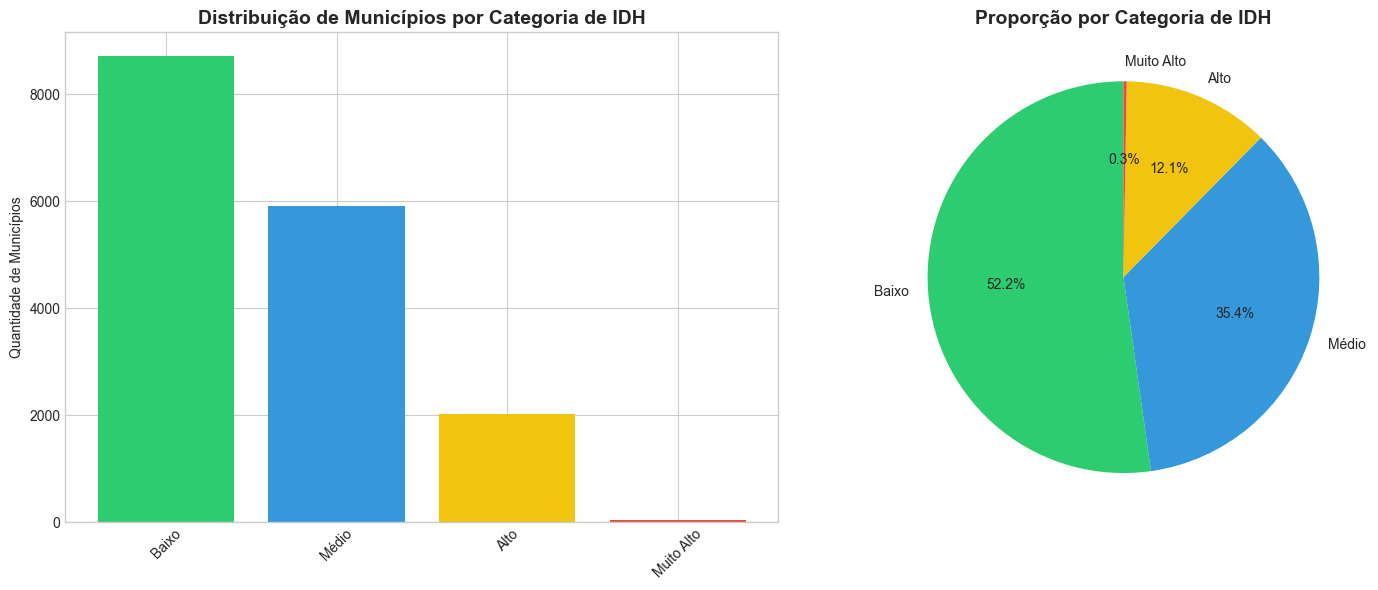


📈 ESTATÍSTICAS DAS CATEGORIAS:
• Baixo: 8722 municípios (52.2%)
• Médio: 5906 municípios (35.4%)
• Alto: 2022 municípios (12.1%)
• Muito Alto: 45 municípios (0.3%)


In [7]:
# Gráfico de distribuição por categorias
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
cores = ['#2ecc71', '#3498db', '#f1c40f', '#e74c3c']  # Verde, Azul, Amarelo, Vermelho
ax1.bar(df_categorias['Categoria'], df_categorias['Quantidade'], color=cores)
ax1.set_title('Distribuição de Municípios por Categoria de IDH', fontsize=14, fontweight='bold')
ax1.set_ylabel('Quantidade de Municípios')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pizza
ax2.pie(df_categorias['Quantidade'], labels=df_categorias['Categoria'], autopct='%1.1f%%', 
        colors=cores, startangle=90)
ax2.set_title('Proporção por Categoria de IDH', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estatísticas das categorias
total_municipios = df_categorias['Quantidade'].sum()
print("\n📈 ESTATÍSTICAS DAS CATEGORIAS:")
for idx, row in df_categorias.iterrows():
    percentual = (row['Quantidade'] / total_municipios) * 100
    print(f"• {row['Categoria']}: {row['Quantidade']} municípios ({percentual:.1f}%)")


## 5. Top 10 Municípios com Melhor IDH

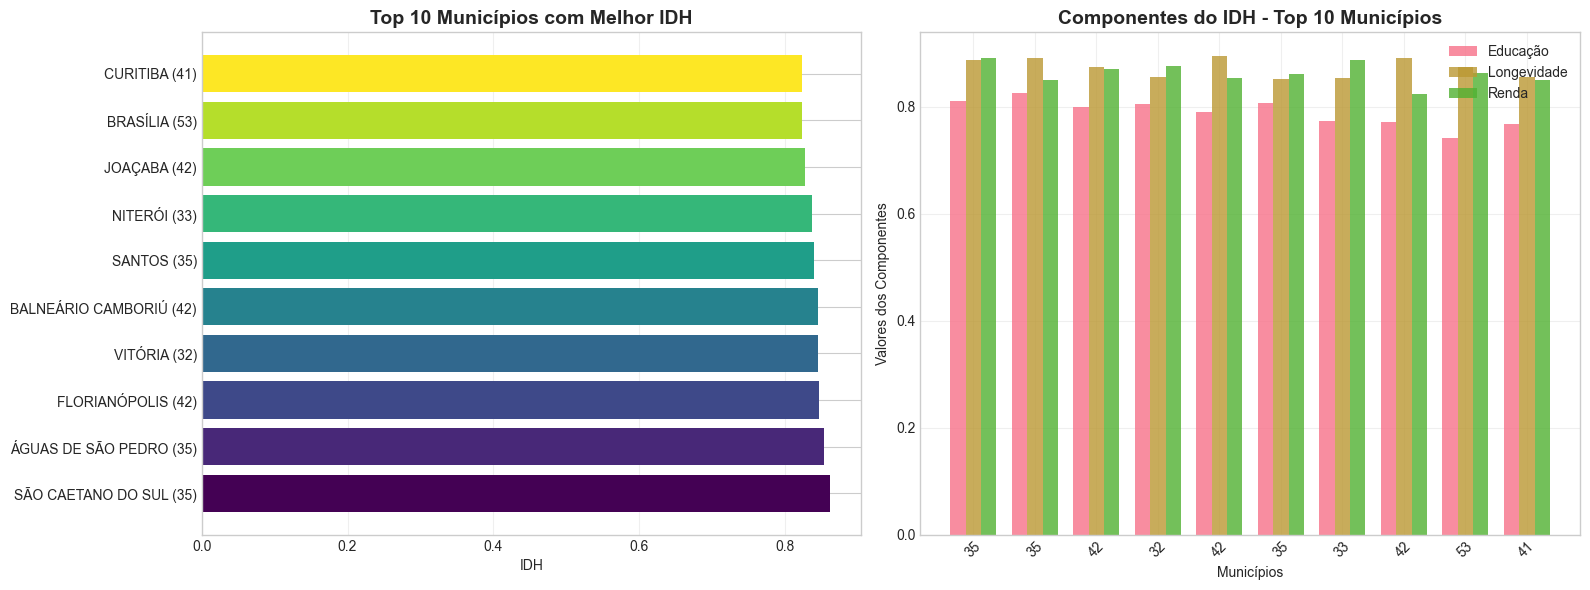

🏆 TOP 10 MUNICÍPIOS - DETALHES:


,município,uf,idhm,idhm_e,idhm_l,idhm_r
0,SÃO CAETANO DO SUL,35,0.8620,0.8110,0.8870,0.8910
1,ÁGUAS DE SÃO PEDRO,35,0.8540,0.8250,0.8900,0.8490
2,FLORIANÓPOLIS,42,0.8470,0.8000,0.8730,0.8700
3,VITÓRIA,32,0.8450,0.8050,0.8550,0.8760
4,BALNEÁRIO CAMBORIÚ,42,0.8450,0.7890,0.8940,0.8540
5,SANTOS,35,0.8400,0.8070,0.8520,0.8610
6,NITERÓI,33,0.8370,0.7730,0.8540,0.8870
7,JOAÇABA,42,0.8270,0.7710,0.8910,0.8230
8,BRASÍLIA,53,0.8240,0.7420,0.8730,0.8630
9,CURITIBA,41,0.8230,0.7680,0.8550,0.8500


In [14]:
# Gráfico do Top 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras horizontais
ax1.barh(df_top10['município'] + ' (' + df_top10['uf'].astype(str) + ')', df_top10['idhm'], 
         color=plt.cm.viridis(np.linspace(0, 1, len(df_top10))))
ax1.set_xlabel('IDH')
ax1.set_title('Top 10 Municípios com Melhor IDH', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Comparação dos componentes do IDH para o Top 10
largura_barra = 0.25
x = np.arange(len(df_top10))
ax2.bar(x - largura_barra, df_top10['idhm_e'], largura_barra, label='Educação', alpha=0.8)
ax2.bar(x, df_top10['idhm_l'], largura_barra, label='Longevidade', alpha=0.8)
ax2.bar(x + largura_barra, df_top10['idhm_r'], largura_barra, label='Renda', alpha=0.8)

ax2.set_xlabel('Municípios')
ax2.set_ylabel('Valores dos Componentes')
ax2.set_title('Componentes do IDH - Top 10 Municípios', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(df_top10['uf'], rotation=45)
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Tabela interativa do Top 10
print("🏆 TOP 10 MUNICÍPIOS - DETALHES:")
display(df_top10.style.format({
    'idhm': '{:.4f}',
    'idhm_e': '{:.4f}', 
    'idhm_l': '{:.4f}',
    'idhm_r': '{:.4f}'
}).background_gradient(cmap='viridis', subset=['idhm', 'idhm_e', 'idhm_l', 'idhm_r']))

## 6. Análise por Estados e Regiões

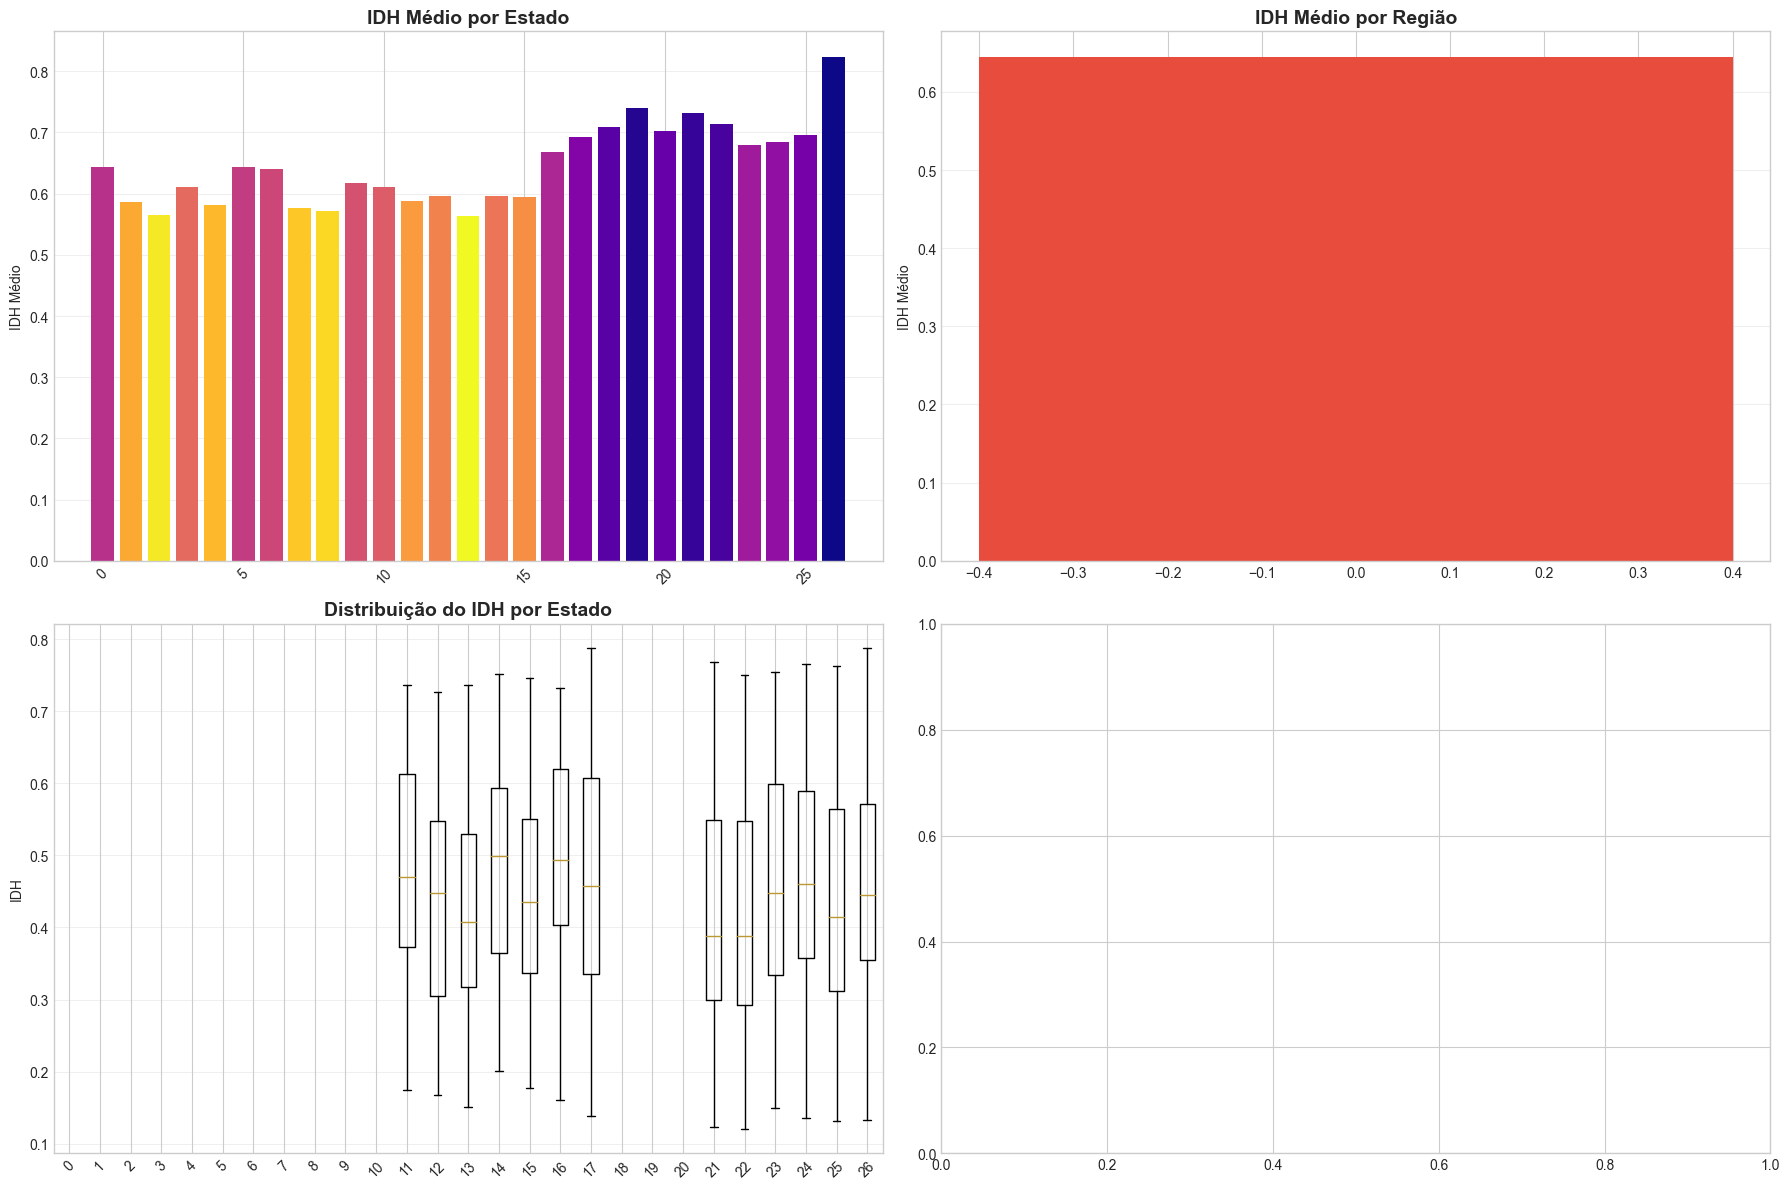

🗺️ ANÁLISE REGIONAL:
• 0: IDH médio = 0.6452 (±0.0659)


In [19]:
# Gráficos comparativos por estado e região
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# IDH por Estado (ordenado)
df_estados_ordenado = df_por_estado.sort_values('mean', ascending=False)
ax1.bar(df_estados_ordenado.index, df_estados_ordenado['mean'], 
        color=plt.cm.plasma(np.linspace(0, 1, len(df_estados_ordenado))))
ax1.set_title('IDH Médio por Estado', fontsize=14, fontweight='bold')
ax1.set_ylabel('IDH Médio')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# IDH por Região
ax2.bar(df_por_regiao.index, df_por_regiao['mean'], 
        color=['#e74c3c', '#e67e22', '#f1c40f', '#2ecc71', '#3498db'])
ax2.set_title('IDH Médio por Região', fontsize=14, fontweight='bold')
ax2.set_ylabel('IDH Médio')
ax2.grid(axis='y', alpha=0.3)

# Distribuição por estado (boxplot)
# Preparar dados para boxplot
dados_boxplot = []
nomes_estados = []
for estado in df_por_estado.index:
    dados_estado = df_classificado[df_classificado['uf'] == estado]['idhm']
    dados_boxplot.append(dados_estado)
    nomes_estados.append(estado)

ax3.boxplot(dados_boxplot, labels=nomes_estados)
ax3.set_title('Distribuição do IDH por Estado', fontsize=14, fontweight='bold')
ax3.set_ylabel('IDH')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# Mapa de calor de correlação entre regiões
if 'regiao' in df_classificado.columns:
    tabela_regioes = pd.crosstab(df_classificado['regiao'], df_classificado['categoria_idh'])
    sns.heatmap(tabela_regioes, annot=True, fmt='d', cmap='YlOrRd', ax=ax4)
    ax4.set_title('Distribuição de Categorias por Região', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Estatísticas regionais
print("🗺️ ANÁLISE REGIONAL:")
for regiao in df_por_regiao.index:
    dados_regiao = df_por_regiao.loc[regiao]
    print(f"• {regiao}: IDH médio = {dados_regiao['mean']:.4f} (±{dados_regiao['std']:.4f})")

## 7. Evolução Temporal do IDH

In [21]:
# Análise da evolução temporal
if 'ano' in df_evolucao.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Evolução do IDH médio
    ax1.plot(df_evolucao['ano'], df_evolucao['mean'], marker='o', linewidth=2, markersize=8, 
             color='#e74c3c', label='IDH Médio')
    ax1.fill_between(df_evolucao['ano'], df_evolucao['mean'] - df_evolucao['std'], 
                     df_evolucao['mean'] + df_evolucao['std'], alpha=0.2, color='#e74c3c')
    ax1.set_title('Evolução do IDH Médio Brasileiro', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Ano')
    ax1.set_ylabel('IDH Médio')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Crescimento percentual anual (se houver múltiplos anos)
    if len(df_evolucao) > 1:
        df_evolucao['crescimento'] = df_evolucao['mean'].pct_change() * 100
        ax2.bar(df_evolucao['ano'][1:], df_evolucao['crescimento'][1:], 
                color=['green' if x > 0 else 'red' for x in df_evolucao['crescimento'][1:]])
        ax2.set_title('Crescimento Anual do IDH (%)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Ano')
        ax2.set_ylabel('Crescimento (%)')
        ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas de evolução
    if len(df_evolucao) > 1:
        crescimento_total = ((df_evolucao['mean'].iloc[-1] - df_evolucao['mean'].iloc[0]) / df_evolucao['mean'].iloc[0]) * 100
        print(f"📈 CRESCIMENTO DO IDH: {crescimento_total:.2f}% entre {df_evolucao['ano'].iloc[0]} e {df_evolucao['ano'].iloc[-1]}")


## 8. Análise dos Componentes do IDH

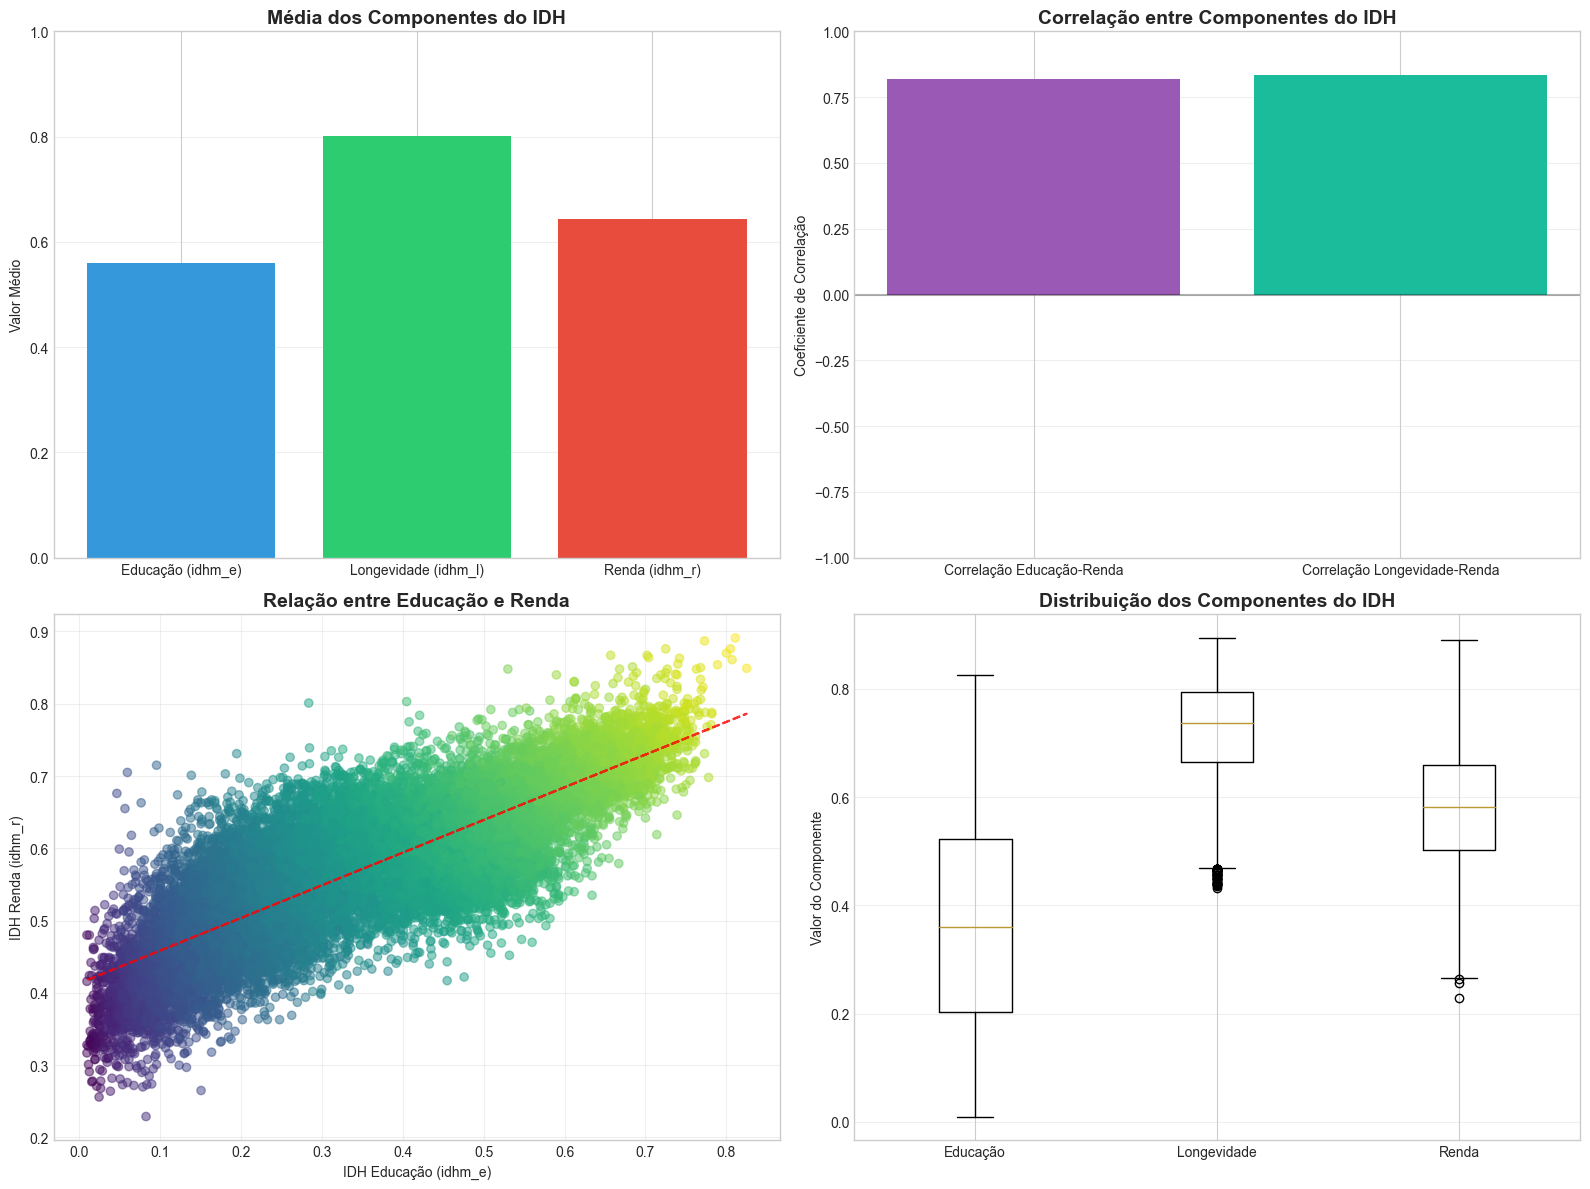

🔍 INSIGHTS DOS COMPONENTES DO IDH:
• Componente mais desenvolvido: Longevidade
• Forte correlação entre Educação e Renda: 0.8196


In [22]:
# Análise detalhada dos componentes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Médias dos componentes
componentes = ['Educação (idhm_e)', 'Longevidade (idhm_l)', 'Renda (idhm_r)']
medias = [df_componentes['idhm_e_media'].iloc[0], 
          df_componentes['idhm_l_media'].iloc[0], 
          df_componentes['idhm_r_media'].iloc[0]]

ax1.bar(componentes, medias, color=['#3498db', '#2ecc71', '#e74c3c'])
ax1.set_title('Média dos Componentes do IDH', fontsize=14, fontweight='bold')
ax1.set_ylabel('Valor Médio')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)

# Correlações entre componentes
correlacoes = ['Correlação Educação-Renda', 'Correlação Longevidade-Renda']
valores_correl = [df_componentes['correlacao_educacao_renda'].iloc[0], 
                  df_componentes['correlacao_longevidade_renda'].iloc[0]]

ax2.bar(correlacoes, valores_correl, color=['#9b59b6', '#1abc9c'])
ax2.set_title('Correlação entre Componentes do IDH', fontsize=14, fontweight='bold')
ax2.set_ylabel('Coeficiente de Correlação')
ax2.set_ylim(-1, 1)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(axis='y', alpha=0.3)

# Dispersão entre Educação e Renda
if 'idhm_e' in df_classificado.columns and 'idhm_r' in df_classificado.columns:
    ax3.scatter(df_classificado['idhm_e'], df_classificado['idhm_r'], 
                alpha=0.5, c=df_classificado['idhm'], cmap='viridis')
    ax3.set_xlabel('IDH Educação (idhm_e)')
    ax3.set_ylabel('IDH Renda (idhm_r)')
    ax3.set_title('Relação entre Educação e Renda', fontsize=14, fontweight='bold')
    ax3.grid(alpha=0.3)
    
    # Adicionar linha de tendência
    z = np.polyfit(df_classificado['idhm_e'], df_classificado['idhm_r'], 1)
    p = np.poly1d(z)
    ax3.plot(df_classificado['idhm_e'], p(df_classificado['idhm_e']), "r--", alpha=0.8)

# Distribuição dos componentes
componentes_data = [df_classificado['idhm_e'], df_classificado['idhm_l'], df_classificado['idhm_r']]
ax4.boxplot(componentes_data, labels=['Educação', 'Longevidade', 'Renda'])
ax4.set_title('Distribuição dos Componentes do IDH', fontsize=14, fontweight='bold')
ax4.set_ylabel('Valor do Componente')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Insights dos componentes
print("🔍 INSIGHTS DOS COMPONENTES DO IDH:")
print(f"• Componente mais desenvolvido: {'Educação' if df_componentes['idhm_e_media'].iloc[0] == max(medias) else 'Longevidade' if df_componentes['idhm_l_media'].iloc[0] == max(medias) else 'Renda'}")
print(f"• Forte correlação entre Educação e Renda: {df_componentes['correlacao_educacao_renda'].iloc[0]:.4f}")

## 9. Análises Avançadas e Insights

In [23]:
# Análises adicionais e insights
print("💡 ANÁLISES AVANÇADAS E INSIGHTS")
print("=" * 50)

# 1. Desigualdade entre municípios
coeficiente_variacao = (df_classificado['idhm'].std() / df_classificado['idhm'].mean()) * 100
print(f"1. 📏 DESIGUALDADE ENTRE MUNICÍPIOS:")
print(f"   • Coeficiente de Variação: {coeficiente_variacao:.2f}%")
print(f"   • Razão entre maior e menor IDH: {df_classificado['idhm'].max()/df_classificado['idhm'].min():.2f}x")

# 2. Análise de clusters por componentes
print(f"\n2. 🎯 PADRÕES NOS COMPONENTES:")
# Identificar municípios com perfis diferentes
df_classificado['perfil'] = 'Equilibrado'
df_classificado.loc[df_classificado['idhm_e'] > df_classificado['idhm_r'] * 1.2, 'perfil'] = 'Educação > Renda'
df_classificado.loc[df_classificado['idhm_r'] > df_classificado['idhm_e'] * 1.2, 'perfil'] = 'Renda > Educação'

contagem_perfis = df_classificado['perfil'].value_counts()
print(f"   • Perfil Equilibrado: {contagem_perfis.get('Equilibrado', 0)} municípios")
print(f"   • Educação > Renda: {contagem_perfis.get('Educação > Renda', 0)} municípios") 
print(f"   • Renda > Educação: {contagem_perfis.get('Renda > Educação', 0)} municípios")

# 3. Análise de outliers
Q1 = df_classificado['idhm'].quantile(0.25)
Q3 = df_classificado['idhm'].quantile(0.75)
IQR = Q3 - Q1
outliers_baixo = df_classificado[df_classificado['idhm'] < (Q1 - 1.5 * IQR)]
outliers_alto = df_classificado[df_classificado['idhm'] > (Q3 + 1.5 * IQR)]

print(f"\n3. 🚨 ANÁLISE DE OUTLIERS:")
print(f"   • Municípios com IDH excepcionalmente alto: {len(outliers_alto)}")
print(f"   • Municípios com IDH excepcionalmente baixo: {len(outliers_baixo)}")

if len(outliers_baixo) > 0:
    print(f"   • Exemplo de município com baixo IDH: {outliers_baixo.iloc[0]['município']} ({outliers_baixo.iloc[0]['uf']}) - IDH: {outliers_baixo.iloc[0]['idhm']:.4f}")

# 4. Ranking relativo por estado
print(f"\n4. 🏅 DESEMPENHO RELATIVO POR ESTADO:")
estado_ranking = df_por_estado.sort_values('mean', ascending=False)
print(f"   • Melhor estado: {estado_ranking.index[0]} (IDH: {estado_ranking['mean'].iloc[0]:.4f})")
print(f"   • Pior estado: {estado_ranking.index[-1]} (IDH: {estado_ranking['mean'].iloc[-1]:.4f})")


💡 ANÁLISES AVANÇADAS E INSIGHTS
1. 📏 DESIGUALDADE ENTRE MUNICÍPIOS:
   • Coeficiente de Variação: 28.30%
   • Razão entre maior e menor IDH: 7.18x

2. 🎯 PADRÕES NOS COMPONENTES:
   • Perfil Equilibrado: 3990 municípios
   • Educação > Renda: 0 municípios
   • Renda > Educação: 12705 municípios

3. 🚨 ANÁLISE DE OUTLIERS:
   • Municípios com IDH excepcionalmente alto: 0
   • Municípios com IDH excepcionalmente baixo: 0

4. 🏅 DESEMPENHO RELATIVO POR ESTADO:
   • Melhor estado: 26 (IDH: 0.8240)
   • Pior estado: 13 (IDH: 0.5635)


## 10. Visualizações Interativas (Plotly)

In [24]:
# Visualizações interativas com Plotly
try:
    # Mapa de calor de correlação
    fig = px.imshow(df_classificado[['idhm', 'idhm_e', 'idhm_l', 'idhm_r']].corr(),
                   title='Matriz de Correlação - Componentes do IDH',
                   color_continuous_scale='RdBu_r',
                   zmin=-1, zmax=1)
    fig.show()
    
    # Scatter plot 3D interativo
    fig = px.scatter_3d(df_classificado.head(100),  # Mostrar apenas 100 para performance
                       x='idhm_e', y='idhm_l', z='idhm_r',
                       color='idhm', size='idhm',
                       hover_data=['município', 'uf'],
                       title='Relação 3D entre os Componentes do IDH',
                       labels={'idhm_e': 'Educação', 'idhm_l': 'Longevidade', 'idhm_r': 'Renda'})
    fig.show()
    
    # Gráfico de violino para distribuição por região
    if 'regiao' in df_classificado.columns:
        fig = px.violin(df_classificado, x='regiao', y='idhm', 
                       color='regiao', box=True, points="all",
                       title='Distribuição do IDH por Região')
        fig.show()
        
except Exception as e:
    print(f"⚠️ Visualizações interativas não disponíveis: {e}")

## 11. Exportação de Relatórios

In [1]:
# Gerar relatório resumido
print("📋 RELATÓRIO RESUMIDO DA ANÁLISE")
print("=" * 60)

relatorio = f"""
RELATÓRIO DE ANÁLISE DO IDH BRASILEIRO
{'=' * 50}

RESUMO EXECUTIVO:
• Período analisado: {df_classificado['ano'].min()} - {df_classificado['ano'].max()}
• Total de municípios: {len(df_classificado)}
• IDH médio nacional: {df_estatisticas['media_idh'].iloc[0]:.4f}

DISTRIBUIÇÃO POR CATEGORIAS:
{df_categorias.to_string(index=False)}

TOP 3 ESTADOS:
1. {estado_ranking.index[0]} - IDH: {estado_ranking['mean'].iloc[0]:.4f}
2. {estado_ranking.index[1]} - IDH: {estado_ranking['mean'].iloc[1]:.4f}  
3. {estado_ranking.index[2]} - IDH: {estado_ranking['mean'].iloc[2]:.4f}

COMPONENTES DO IDH:
• Educação: {df_componentes['idhm_e_media'].iloc[0]:.4f}
• Longevidade: {df_componentes['idhm_l_media'].iloc[0]:.4f}
• Renda: {df_componentes['idhm_r_media'].iloc[0]:.4f}

PRINCIPAIS INSIGHTS:
• Desigualdade entre municípios: {coeficiente_variacao:.2f}%
• Correlação Educação-Renda: {df_componentes['correlacao_educacao_renda'].iloc[0]:.4f}
• Municípios com IDH muito alto: {df_categorias[df_categorias['Categoria'] == 'Muito Alto']['Quantidade'].iloc[0]}
"""

print(relatorio)

# Salvar relatório em arquivo
with open(f"{DATA_PATH}relatorio_analise_completo.txt", "w", encoding="utf-8") as f:
    f.write(relatorio)

print(f"\n💾 Relatório salvo em: {DATA_PATH}relatorio_analise_completo.txt")
print("\n🎉 ANÁLISE CONCLUÍDA COM SUCESSO!")

📋 RELATÓRIO RESUMIDO DA ANÁLISE


NameError: name 'df_classificado' is not defined

# ## 🎯 Conclusão
# 
# Esta análise exploratória revela importantes padrões e desigualdades no desenvolvimento humano municipal brasileiro. Os dados processados pelo pipeline permitiram identificar:
# 
# - **Desigualdades regionais** significativas
# - **Correlações interessantes** entre os componentes do IDH  
# - **Municípios exemplares** e aqueles que precisam de atenção
# - **Evolução temporal** do desenvolvimento humano
# 
# Os insights gerados podem subsidiar políticas públicas e pesquisas acadêmicas.